In [1]:

import numpy as np
from numpy import argmax
import re
import csv
import numpy as np
import pandas as pd
global alphabet
global maxlen
global N_LANG
N_LANG=10
maxlen=32
alphabet = "abcdefghijklmnopqrstuvwxyz"
def one_hot_encode(data):
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in data]
  onehot_encoded = []
  
  for value in integer_encoded:
    letter = np.zeros(len(alphabet))
    letter[value] = 1
    onehot_encoded.append(letter)
  while(len(onehot_encoded)<maxlen):
    letter = np.zeros(len(alphabet))
    onehot_encoded.append(letter)
  return  np.array(onehot_encoded)

def process(test_str):
  test_str=test_str.lower()
  test_str = re.sub(r'[^a-zA-Z ]', '', test_str)
  return test_str

def encode_labels(label):
  temp = np.zeros(N_LANG)
  temp[label-1] = 1
  return temp


def invert_one_hot_encode(data):
  int_to_char = dict((i, c) for i, c in enumerate(alphabet))
  inverted=""
  for ch in data:
    inverted+= int_to_char[argmax(ch)]

In [19]:
#counts=[]
X=[]
Y=[]
df=pd.read_csv('https://github.com/404S-retr0/HPE_Project_Grp-8/blob/main/Data_Wordlists.csv?raw=true')
for word,lang in zip(df.WORDS,df.LANGAUAGE_VECTOR):
    #counts.append(lang)
    if(pd.isna(word)):
      continue
    if(len(word)<=maxlen):
      X.append(one_hot_encode(process(word)))
      Y.append(encode_labels(int(lang)))



X=np.array(X)
Y=np.array(Y)



In [20]:
X=np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))
X.shape

(964932, 832)

In [6]:
Y.shape

(964932, 10)

In [4]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, TensorBoard


Using TensorFlow backend.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)
del X
del Y

In [21]:
''''
X_train, X_test, y_train, y_test 
    = train_test_split(X, y, test_size=0.1, random_state=7)

 X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.30, random_state=7) # 0.25 x 0.8 = 0.2

''''''

ValueError: too many values to unpack (expected 2)

In [6]:
network = Sequential()
network.add(Dense(700, input_dim=26*maxlen, activation='sigmoid'))
network.add(Dense(500, activation='sigmoid'))
network.add(Dense(300, activation='sigmoid'))
network.add(Dense(100, activation='sigmoid'))
network.add(Dense(N_LANG, activation='softmax'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
tboard = TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
callbacks_list = [checkpoint, tboard]

history=network.fit(X_train, y_train, epochs=100, batch_size=1086, validation_data=(X_test, y_test), callbacks=callbacks_list,verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






/anaconda/envs/azureml_py36/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


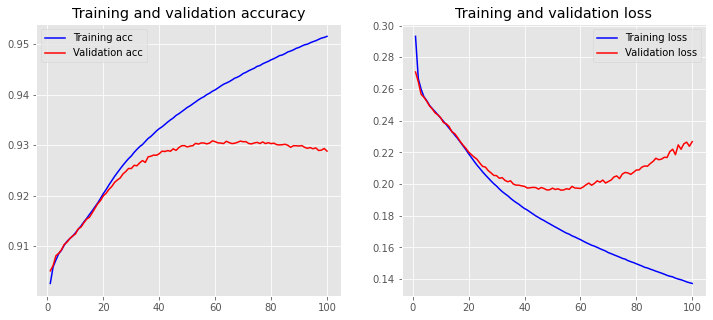

In [18]:
plot_history(history)

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])